# K-Means


The pinguins are back! Use K-Means to find groups from the penguins dataset. Do they correspond to the true labels?

In [2]:
import os
os.environ["OMP_NUM_THREADS"] = '1'

In [3]:
import pandas as pd
import seaborn as sns 
from palmerpenguins import load_penguins
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy.optimize import linear_sum_assignment
sns.set_style('whitegrid')

In [4]:
penguins = load_penguins()
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


In [5]:
penguins = penguins.dropna()

In [6]:
X = penguins[['bill_length_mm','bill_depth_mm','flipper_length_mm','body_mass_g']]

In [7]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

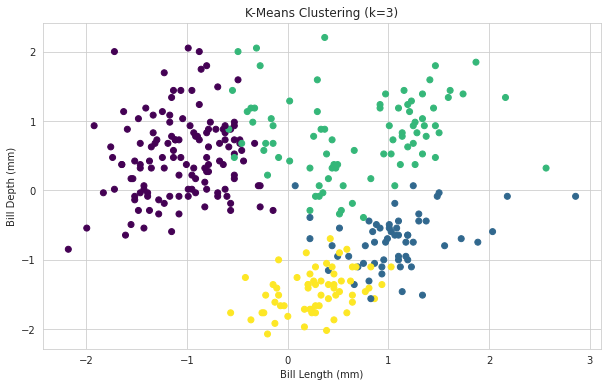

In [8]:
#Make a plot where the color is the label assigned by the clustering
# train K-means model with optimal k=3
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=42)
kmeans.fit(X)

# assign cluster labels to data points
labels = kmeans.labels_

# create scatter plot with color representing cluster label
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
plt.xlabel('Bill Length (mm)')
plt.ylabel('Bill Depth (mm)')
plt.title('K-Means Clustering (k=3)')
plt.show()


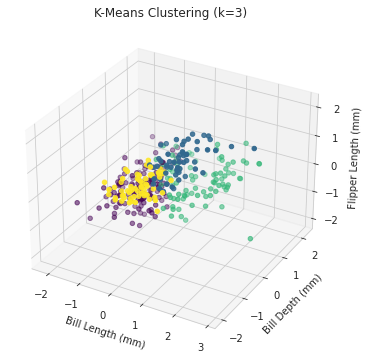

In [9]:
#Make a 3D plot where the color is the label assigned by the clustering
from mpl_toolkits.mplot3d import Axes3D

# train K-means model with optimal k=3
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=42)
kmeans.fit(X)

# assign cluster labels to data points
labels = kmeans.labels_

# create 3D scatter plot with color representing cluster label
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=labels, cmap='viridis')
ax.set_xlabel('Bill Length (mm)')
ax.set_ylabel('Bill Depth (mm)')
ax.set_zlabel('Flipper Length (mm)')
ax.set_title('K-Means Clustering (k=3)')
plt.show()


In [10]:
#TODO To which label each class correspond? Search about scipy linear_sum_assignment
#It is an optimization problem.
#Show the table
# use linear_sum_assignment to find optimal label assignment
y_true = penguins['species'].astype('category').cat.codes.values
n_classes = len(np.unique(y_true))
cost_matrix = np.zeros((n_classes, n_classes))
for i in range(n_classes):
    for j in range(n_classes):
        cost_matrix[i, j] = -np.sum((labels == i) & (y_true == j))
row_ind, col_ind = linear_sum_assignment(cost_matrix)

# create table of label assignments
table = pd.DataFrame(columns=['Cluster Label', 'True Label'])
for i in range(n_classes):
    table = table.append({'Cluster Label': i, 'True Label': col_ind[i]}, ignore_index=True)

print(table)


  Cluster Label True Label
0             0          0
1             1          2
2             2          1


/tmp/ipykernel_465/4281122294.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append({'Cluster Label': i, 'True Label': col_ind[i]}, ignore_index=True)
/tmp/ipykernel_465/4281122294.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append({'Cluster Label': i, 'True Label': col_ind[i]}, ignore_index=True)
/tmp/ipykernel_465/4281122294.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append({'Cluster Label': i, 'True Label': col_ind[i]}, ignore_index=True)


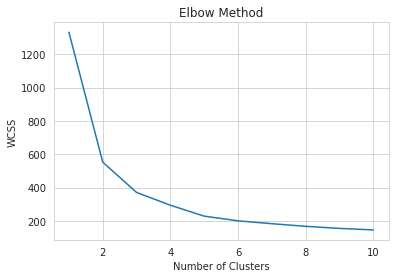

In [11]:
#TODO Do the elbow method for different k's
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()


Iteration 1: loss = 694.9156034947599
Iteration 2: loss = 694.6699853372469
Iteration 3: loss = 695.0146879398618
Iteration 4: loss = 717.1366470553154
Iteration 5: loss = 709.3513709713139
Iteration 6: loss = 704.5892358741022
Iteration 7: loss = 694.8886657702614
Iteration 8: loss = 695.0146879398618
Iteration 9: loss = 695.7607454486879
Iteration 10: loss = 694.8886657702614
Iteration 11: loss = 717.2458552800595
Iteration 12: loss = 717.260611148585
Iteration 13: loss = 695.0022265894002
Iteration 14: loss = 710.5308617627718
Iteration 15: loss = 711.6580681417609
Iteration 16: loss = 717.6219966337746
Iteration 17: loss = 694.8717684355623
Iteration 18: loss = 694.749613291435
Iteration 19: loss = 695.008292216205
Iteration 20: loss = 709.3028712798382
Iteration 21: loss = 695.0960583185044
Iteration 22: loss = 694.8651986352269
Iteration 23: loss = 694.9156034947599
Iteration 24: loss = 694.9351390164279
Iteration 25: loss = 695.0045921433683
Iteration 26: loss = 717.259584303613

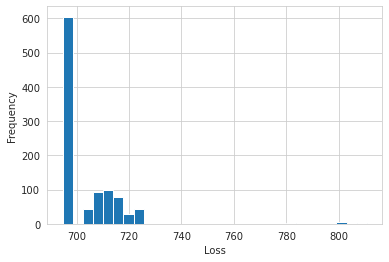

In [12]:
#TODO train 1000 models, with random initialization. Plot the results of the losses


# generate some sample data
np.random.seed(42)
X = np.random.randn(1000, 2)

# train 1000 models, with random initialization, and record their losses
losses = []
best_loss = float('inf')
best_iteration = None

for i in range(1000):
    kmeans = KMeans(n_clusters=4, init='random', n_init=1, random_state=i)
    kmeans.fit(X)
    losses.append(kmeans.inertia_)
    loss = kmeans.inertia_
    if loss < best_loss:
        best_loss = loss
        best_iteration = i
    print(f'Iteration {i+1}: loss = {loss}')

print(f'\nBest loss = {best_loss} achieved in iteration {best_iteration+1}.')

# plot the histogram of the losses
plt.hist(losses, bins=30)
plt.xlabel('Loss')
plt.ylabel('Frequency')
plt.show()


Iteration 1: loss = 892.5997096755328
Iteration 2: loss = 904.8096986148073
Iteration 3: loss = 904.9736252144021
Iteration 4: loss = 892.6904975593101
Iteration 5: loss = 904.975862021572
Iteration 6: loss = 904.9803781763179
Iteration 7: loss = 891.3137767415508
Iteration 8: loss = 904.8265823445364
Iteration 9: loss = 909.2941190970503
Iteration 10: loss = 905.294643674708
Iteration 11: loss = 905.1659610041294
Iteration 12: loss = 891.3137767415508
Iteration 13: loss = 914.9566291984394
Iteration 14: loss = 891.3137767415508
Iteration 15: loss = 892.7811680551196
Iteration 16: loss = 909.2867209511968
Iteration 17: loss = 904.9084032673765
Iteration 18: loss = 891.156457462214
Iteration 19: loss = 891.3154164477086
Iteration 20: loss = 892.3903580915716
Iteration 21: loss = 892.679939818926
Iteration 22: loss = 904.8829165756447
Iteration 23: loss = 904.9736252144021
Iteration 24: loss = 903.2687085662387
Iteration 25: loss = 892.1125940040924
Iteration 26: loss = 905.1103534484959

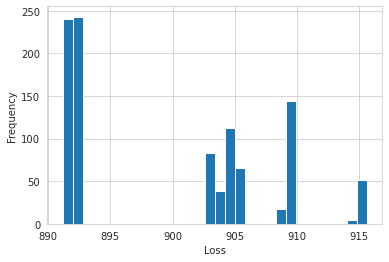

In [13]:
#TODO train 1000 models, with a better initialization. Plot the results of the losses

# generate some sample data
np.random.seed(42)
X = np.random.randn(1000, 2)

# train 1000 models, with k-means++ initialization, and record their losses
losses = []
best_loss = float('inf')
best_iteration = None

for i in range(1000):
    kmeans = KMeans(n_clusters=3, init='k-means++', n_init=1, max_iter=300, random_state=i)
    kmeans.fit(X)
    losses.append(kmeans.inertia_)
    loss = kmeans.inertia_
    if loss < best_loss:
        best_loss = loss
        best_iteration = i
    print(f'Iteration {i+1}: loss = {loss}')

print(f'\nBest loss = {best_loss} achieved in iteration {best_iteration+1}.')

# plot the histogram of the losses
plt.hist(losses, bins=30)
plt.xlabel('Loss')
plt.ylabel('Frequency')
plt.show()



We have already seen the K-Means class. We know that it can help us to reduce dimensionality and understand how the data behave. We can use it for finding groups and classify them. Now, we are going to use it to do image segmentation.  

What do you think are the data points?  
How can we evaluate each point?  
How is different an image from a normal matrix of data?  

We are going to use RGB images. They have three channels and we must take those into account while computing the groups.

<img src="three_d_array.png" alt="three_d_array" width="300"/>

This time, you will have to implement K-Means by hand, do not use the sklearn. How can you define the centroids?

In [75]:
#Import libraries
from skimage import io, transform
from skimage import color

import numpy as np
import matplotlib.pyplot as plt

import pandas as pd
%matplotlib inline
import requests

In [144]:
#Download image. Feel free to change the image. Remember that we are working with RGB images.
url = "https://www.rainforest-alliance.org/wp-content/uploads/2021/06/poison-dart-frog-thumb-1-400x400.jpg"
img_data = requests.get(url).content
with open('image.jpg', 'wb') as handler:
    handler.write(img_data)
img = io.imread("image.jpg")

(-0.5, 399.5, 399.5, -0.5)

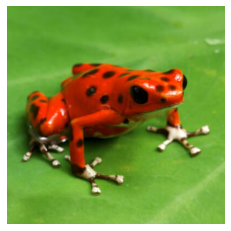

In [16]:
#Show image
plt.imshow(img)
plt.axis("off")

In [17]:
#Check the shape of the image. If there are more or less channels, we might have an image in another format
img.shape

(400, 400, 3)

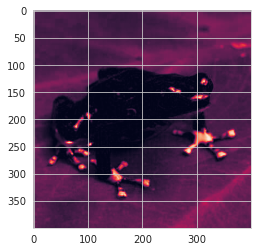

In [18]:
#Show just the blue channel
plt.imshow(img[:,:,2])

In [50]:
#TODO Feel free to change the method definition and documentation, you can create the method that you need

#Method for computing the new centroids. The parameters are:
#     - centroids. Current centroids.
#     - data. data[0] will contain the image
#             data[1] will contain the current label or centroid
# Returns the new centroids. The data and labels do not change.

    # For each centroid, calculate the new center by finding the mean of the data points in each channel






In [84]:
#TODO Feel free to change the method definition and documentation, you can create the method that you need

#Method for assigning the points to a new centroid. The parameters are:
#     - centroids. Current centroids.
#     - data. data[0] will contain the image
#             data[1] will contain the current label or centroid
# Returns the new labels. The points are assigned based on Euclidean distance.

    # Assign each pixel to the closest centroid using the new centroids


In [101]:
#TODO Feel free to change the method definition and documentation, you can create the method that you need

#Method that implements K-Means. The parameters are:
#     - k. The problem with K-Means is that it needs a hyperparameter k, selected by the user.
#     - image. 
#Returns a segmented image.
def compute_centroids(centroids, data):
    new_centroids = np.zeros_like(centroids)

    for i in range(centroids.shape[0]):
        idx = (data[1] == i)
        pixels = data[0][idx]
        if pixels.size == 0:
            new_centroids[i] = [np.random.randint(0, 255) for _ in range(3)]
        else:
            new_center = np.mean(pixels, axis=0)
            new_centroids[i] = new_center

    return new_centroids
def assign(centroids, data):    
    new_labels = np.zeros_like(data[1])
    for i in range(data[0].shape[0]):
        for j in range(data[0].shape[1]):            
            pixel = data[0][i,j]
            distances = np.linalg.norm(pixel - centroids, axis=1)            
            new_labels[i,j] = np.argmin(distances)
        

    return new_labels
    
def k_means(k, image):
    centroids = np.random.randint(0, 255, size=(k, 3))
        
    labels = np.zeros((image.shape[0], image.shape[1]), dtype=np.uint8)

    # Initialize the old_labels array with ones to enter the loop
    old_labels = np.ones_like(labels)

    # Loop until the labels converge
    while not np.array_equal(old_labels, labels):
        # Assign each pixel to the nearest centroid
        data = (image, labels)
        new_labels = assign(centroids, data)

        # Update the centroids based on the new labels
        data = (image, new_labels)
        new_centroids = compute_centroids(centroids, data)

        # Update the old labels and centroids
        old_labels = labels
        centroids = new_centroids
        labels = new_labels

    # Map each label to a unique RGB color
    colors = np.array([centroids[i] for i in range(k)])
    new_i = colors[labels]

    return new_i

In [54]:
def print_images(imagenes,img):
    #Configuration of the plot
    plt.figure(figsize=(15, 10))
    plt.subplot(np.ceil(len(imagenes)/3).astype(int), 3, 1)

    #Show original image
    plt.imshow(img)
    plt.title("Original Image")
    plt.axis("off")

    #Show the segmented images
    for idx in range(len(imagenes)):
        plt.subplot((np.ceil(len(imagenes)/3)).astype(int), 3, 2 + idx)
        plt.imshow(imagenes[idx].astype('uint8'))
        plt.title(f"{idx+1} Colors")
        plt.axis("off")
    plt.show()

In [145]:
#Get 8 new images, with a different number of clusters

images = []
for k in range(1,9):
    images.append(k_means(k,img))

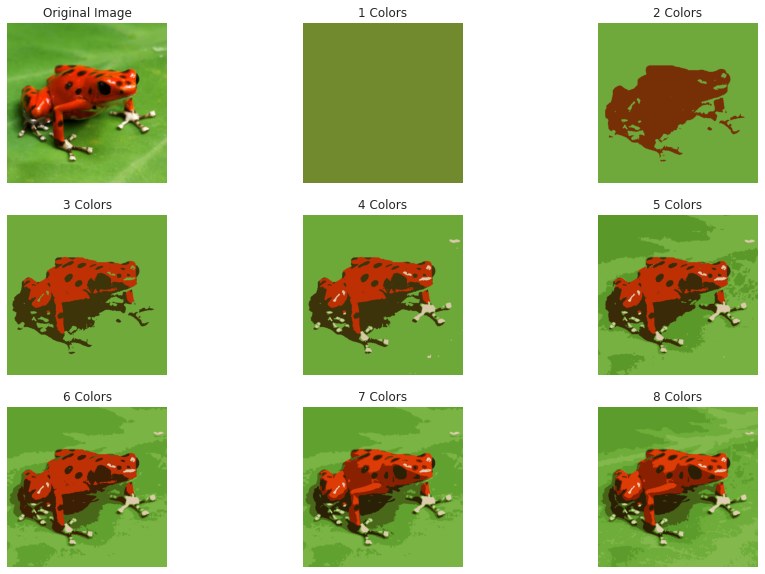

In [146]:
print_images(images,img)

In [149]:
img1 = io.imread("1-Resize.jpg")
img2 = io.imread("2-Resize.jpg")
img3 = io.imread("3-Resize.jpg")

In [150]:
images1 = []
for k in range(1,9):
    images1.append(k_means(k,img1))

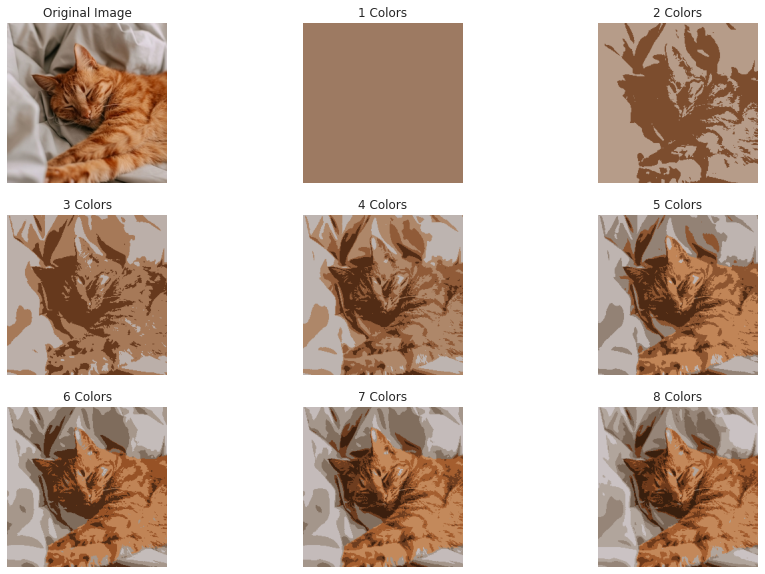

In [151]:
print_images(images1,img1)

In [152]:
images2 = []
for k in range(1,9):
    images2.append(k_means(k,img2))

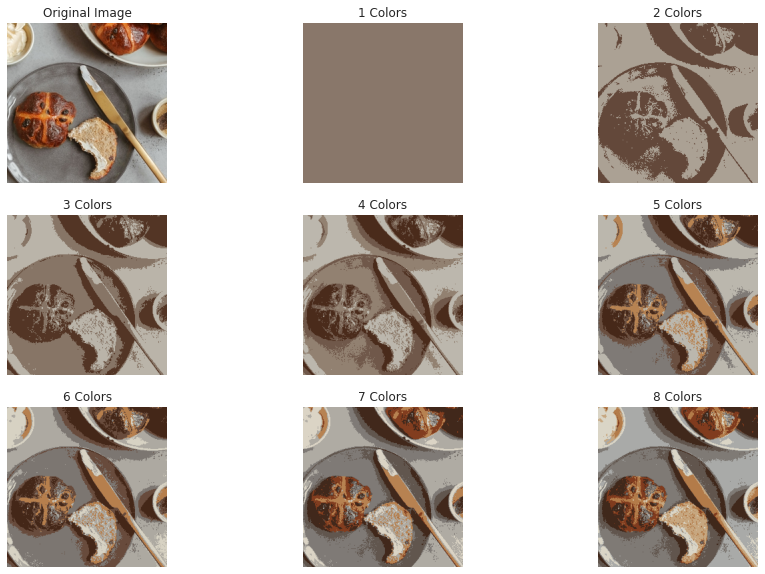

In [153]:
print_images(images2,img2)

In [154]:
images3 = []
for k in range(1,9):
    images3.append(k_means(k,img3))

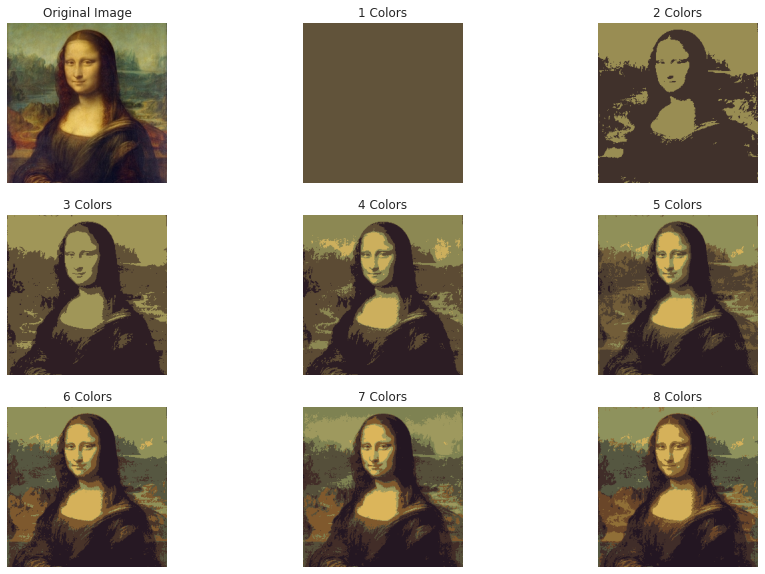

In [155]:
print_images(images3,img3)